# 01.01 - PROYECTO KAGGLE

In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


## unzip and inspect data

In [4]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## Cargar `train.csv` con pandas



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("train.csv")
print ("shape of loaded dataframe", data.shape)


shape of loaded dataframe (692500, 12)


In [7]:
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


<ipython-input-8-fbbf95b6e55e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='RENDIMIENTO_GLOBAL', palette="viridis")


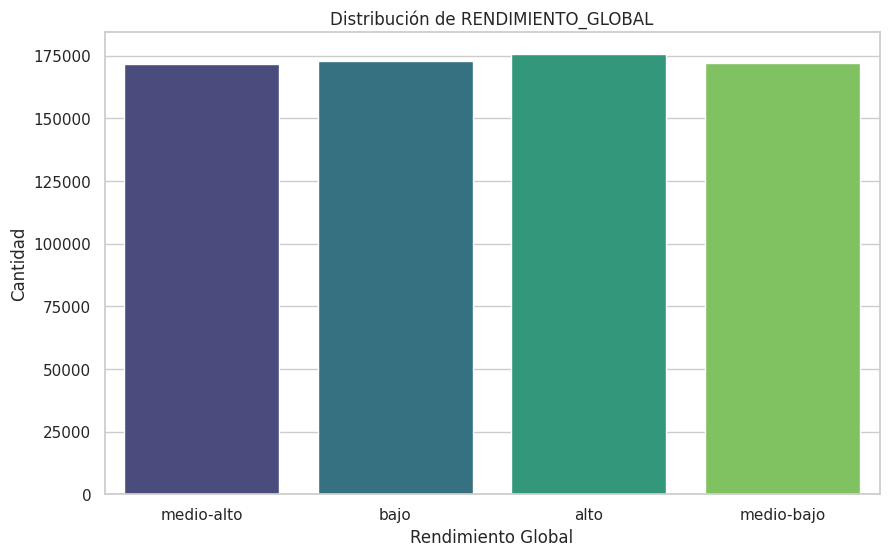

In [8]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# 1. Distribución de la variable 'RENDIMIENTO_GLOBAL'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='RENDIMIENTO_GLOBAL', palette="viridis")
plt.title('Distribución de RENDIMIENTO_GLOBAL')
plt.ylabel('Cantidad')
plt.xlabel('Rendimiento Global')
plt.show()



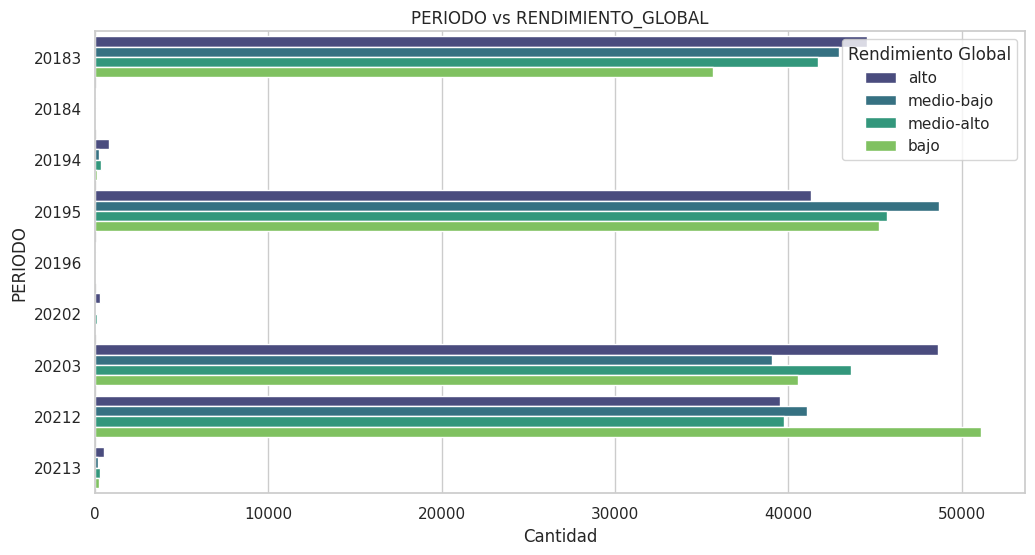

In [9]:
# 2. PERIODO vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='PERIODO', hue='RENDIMIENTO_GLOBAL', palette="viridis")
plt.title('PERIODO vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('PERIODO')
plt.legend(title='Rendimiento Global')
plt.show()

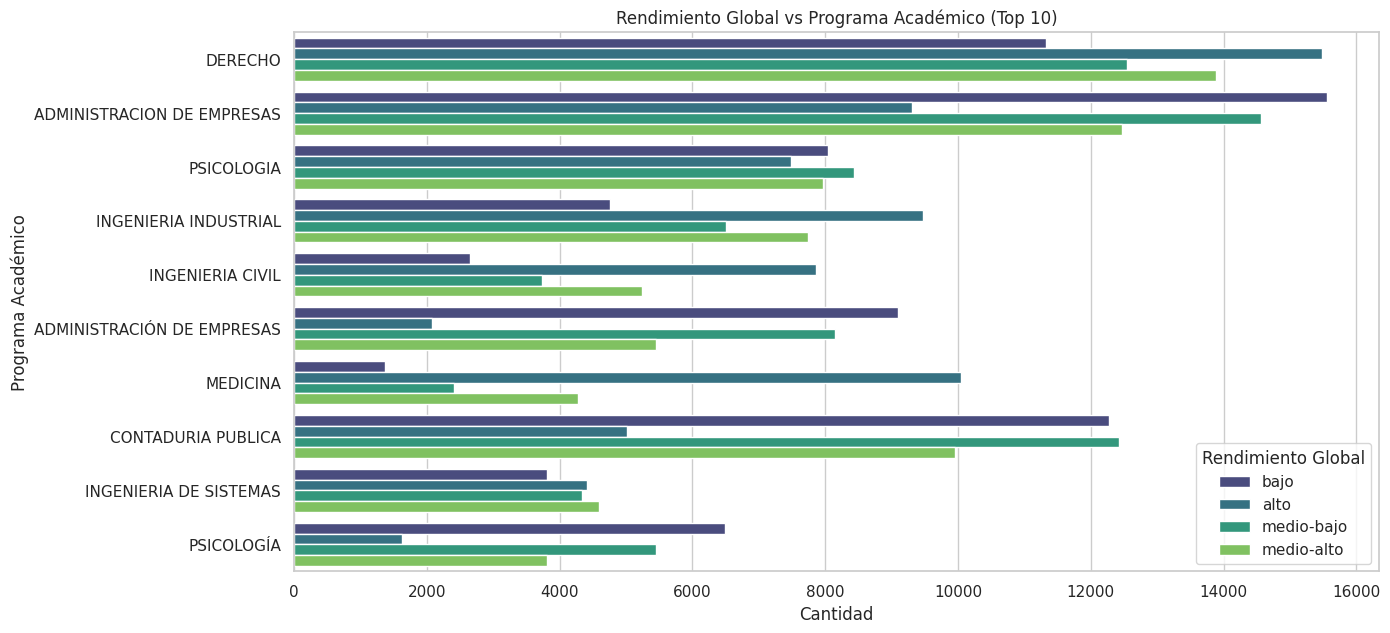

In [10]:
# 3. Relación entre 'RENDIMIENTO_GLOBAL' y 'ESTU_PRGM_ACADEMICO' (los 10 programas más frecuentes)
top_programs = data['ESTU_PRGM_ACADEMICO'].value_counts().index[:10]
filtered_data = data[data['ESTU_PRGM_ACADEMICO'].isin(top_programs)]

plt.figure(figsize=(14, 7))
sns.countplot(data=filtered_data, y='ESTU_PRGM_ACADEMICO', hue='RENDIMIENTO_GLOBAL', palette="viridis")
plt.title('Rendimiento Global vs Programa Académico (Top 10)')
plt.ylabel('Programa Académico')
plt.xlabel('Cantidad')
plt.legend(title='Rendimiento Global')
plt.show()

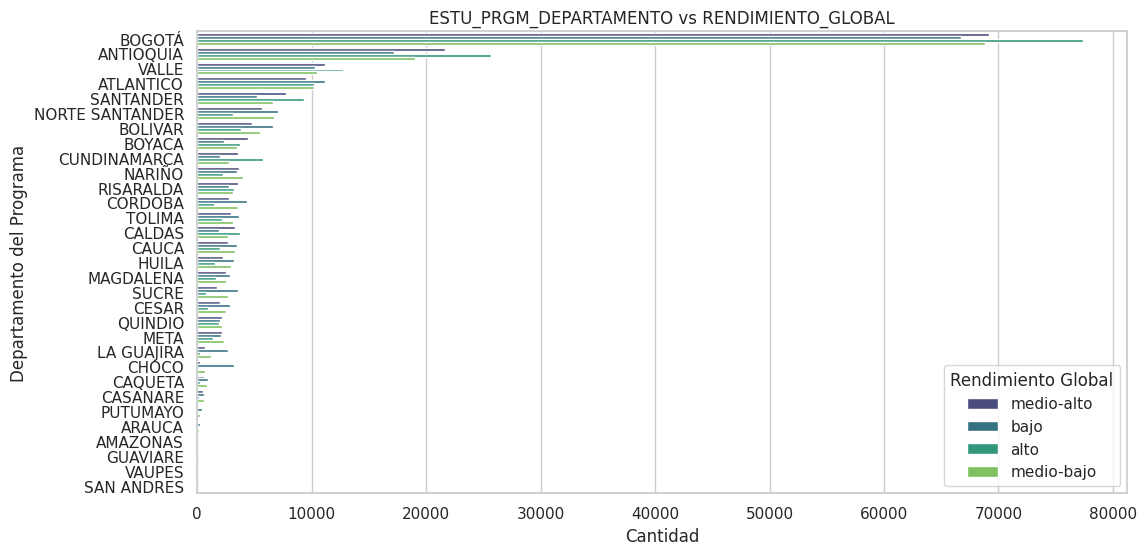

In [11]:
# 4. ESTU_PRGM_DEPARTAMENTO vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='ESTU_PRGM_DEPARTAMENTO', hue='RENDIMIENTO_GLOBAL',
              order=data['ESTU_PRGM_DEPARTAMENTO'].value_counts().index, palette="viridis")
plt.title('ESTU_PRGM_DEPARTAMENTO vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Departamento del Programa')
plt.legend(title='Rendimiento Global')
plt.show()

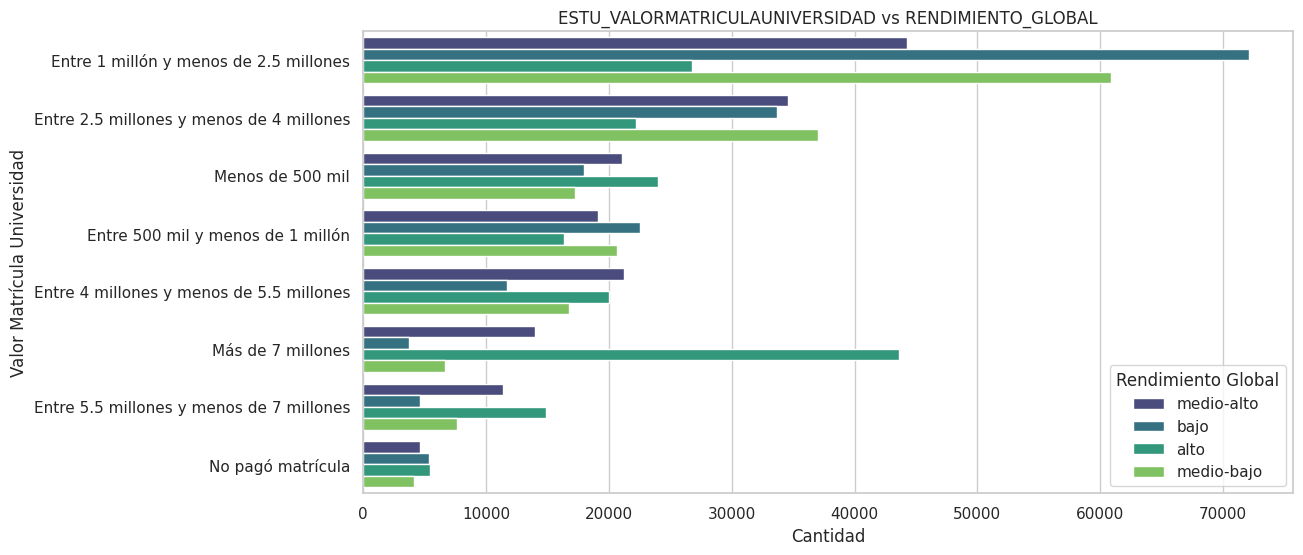

In [12]:
# 5. ESTU_VALORMATRICULAUNIVERSIDAD vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='ESTU_VALORMATRICULAUNIVERSIDAD', hue='RENDIMIENTO_GLOBAL',
              order=data['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().index, palette="viridis")
plt.title('ESTU_VALORMATRICULAUNIVERSIDAD vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Valor Matrícula Universidad')
plt.legend(title='Rendimiento Global')
plt.show()

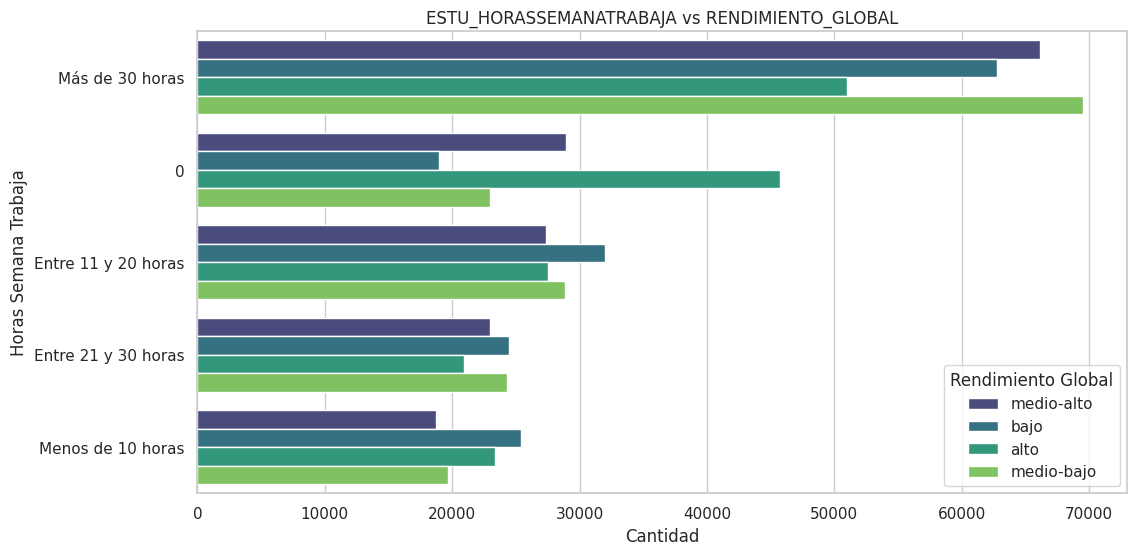

In [13]:
# 6. ESTU_HORASSEMANATRABAJA vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='ESTU_HORASSEMANATRABAJA', hue='RENDIMIENTO_GLOBAL',
              order=data['ESTU_HORASSEMANATRABAJA'].value_counts().index, palette="viridis")
plt.title('ESTU_HORASSEMANATRABAJA vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Horas Semana Trabaja')
plt.legend(title='Rendimiento Global')
plt.show()

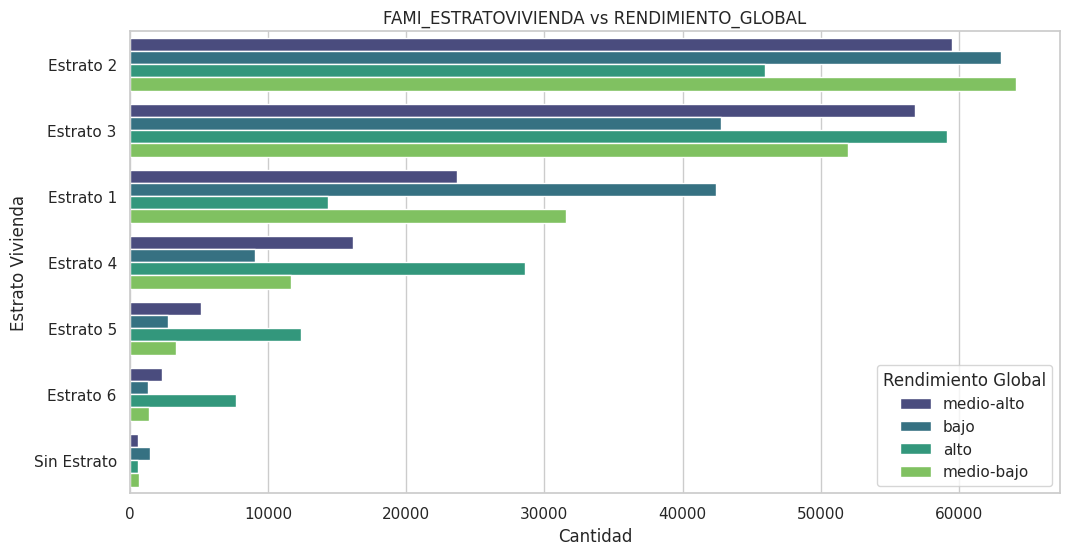

In [14]:
# 7. FAMI_ESTRATOVIVIENDA vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='FAMI_ESTRATOVIVIENDA', hue='RENDIMIENTO_GLOBAL',
              order=data['FAMI_ESTRATOVIVIENDA'].value_counts().index, palette="viridis")
plt.title('FAMI_ESTRATOVIVIENDA vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Estrato Vivienda')
plt.legend(title='Rendimiento Global')
plt.show()

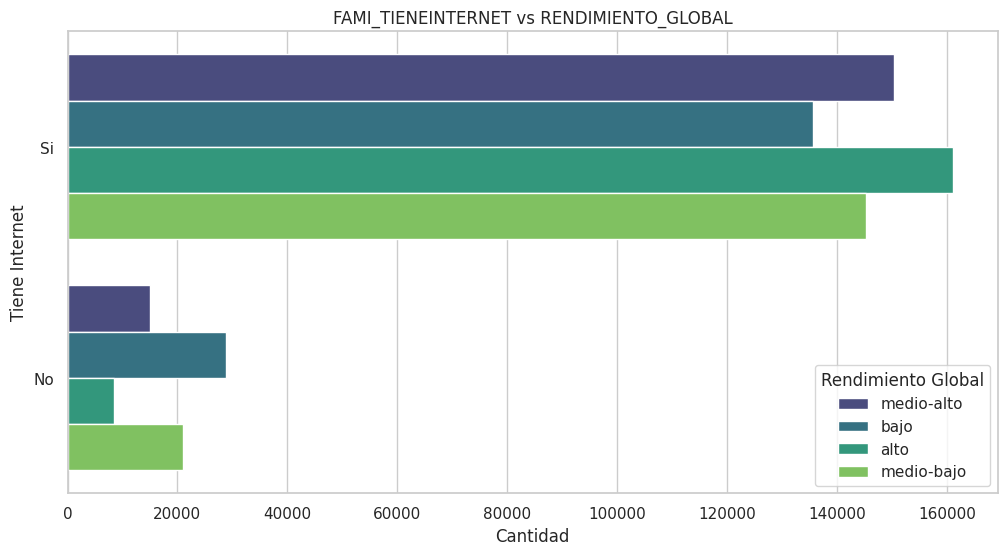

In [15]:
# 8. FAMI_TIENEINTERNET vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='FAMI_TIENEINTERNET', hue='RENDIMIENTO_GLOBAL', palette="viridis")
plt.title('FAMI_TIENEINTERNET vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Tiene Internet')
plt.legend(title='Rendimiento Global')
plt.show()

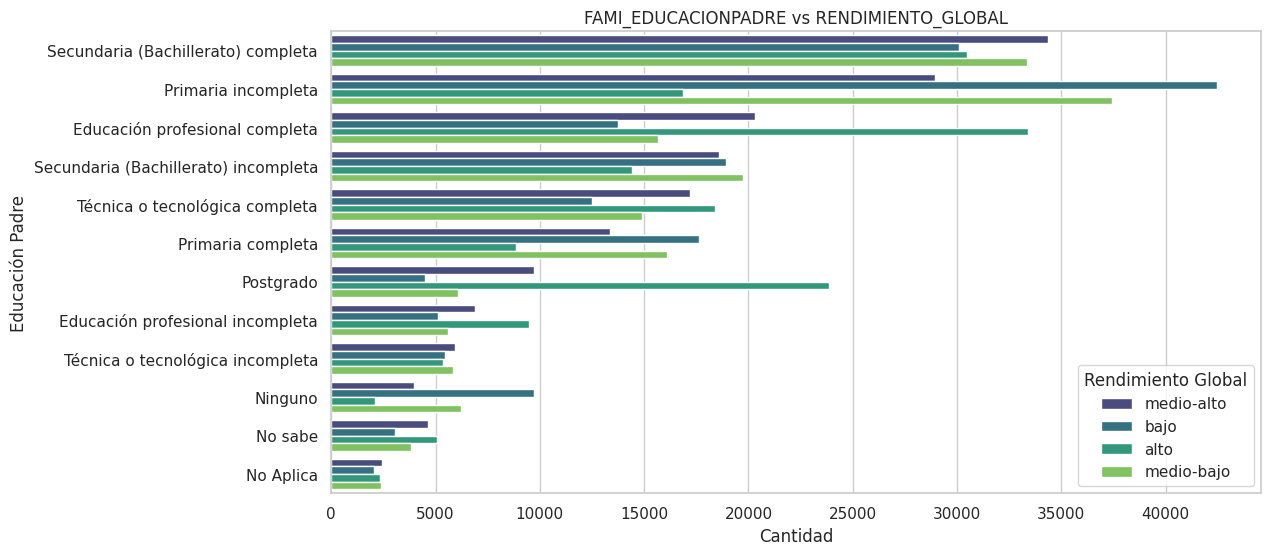

In [16]:
# 9. FAMI_EDUCACIONPADRE vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='FAMI_EDUCACIONPADRE', hue='RENDIMIENTO_GLOBAL',
              order=data['FAMI_EDUCACIONPADRE'].value_counts().index, palette="viridis")
plt.title('FAMI_EDUCACIONPADRE vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Educación Padre')
plt.legend(title='Rendimiento Global')
plt.show()

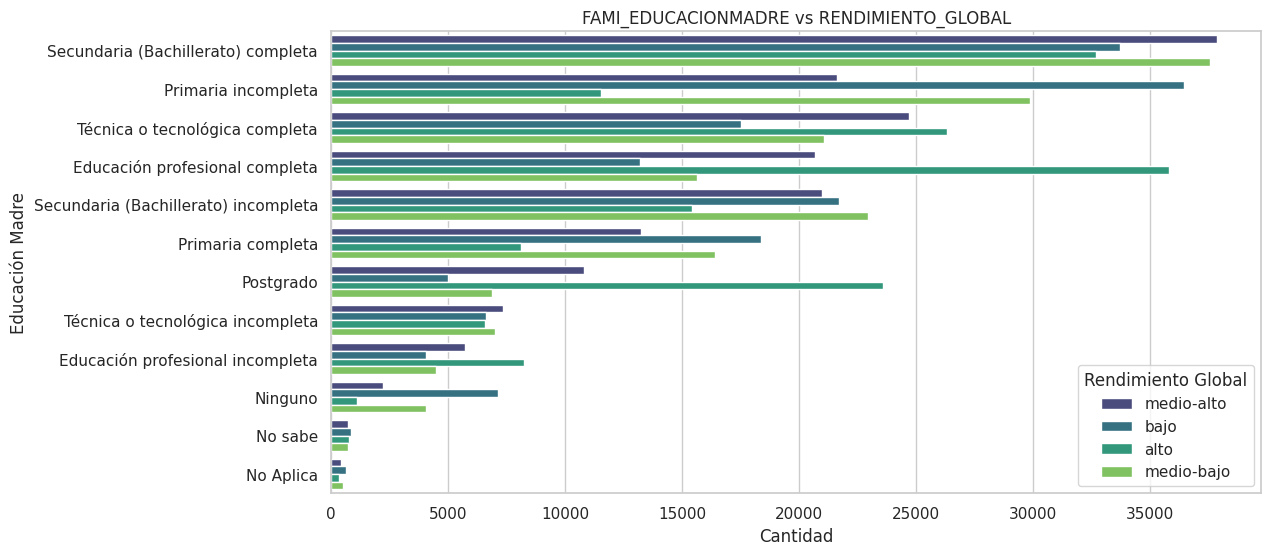

In [17]:
# 10. FAMI_EDUCACIONMADRE vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='FAMI_EDUCACIONMADRE', hue='RENDIMIENTO_GLOBAL',
              order=data['FAMI_EDUCACIONMADRE'].value_counts().index, palette="viridis")
plt.title('FAMI_EDUCACIONMADRE vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Educación Madre')
plt.legend(title='Rendimiento Global')
plt.show()

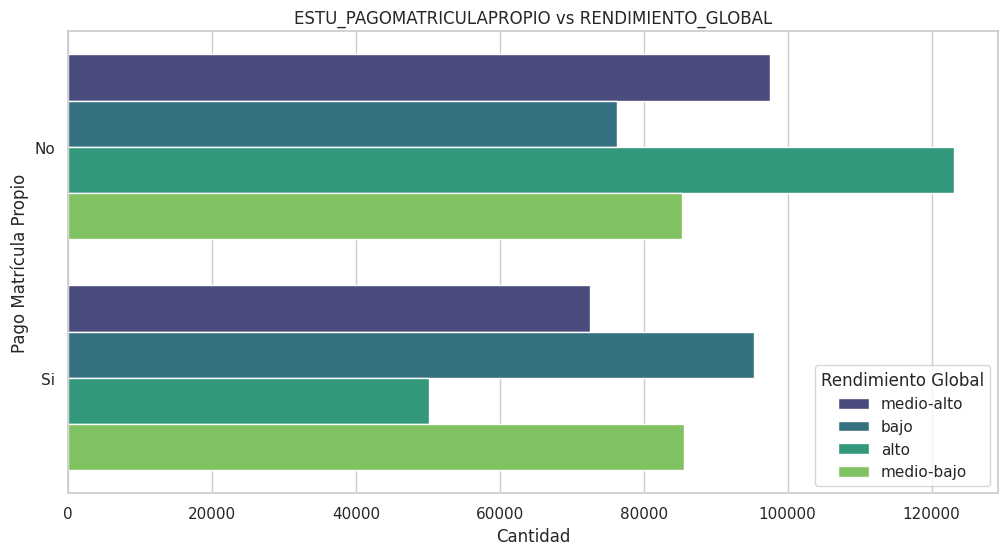

In [18]:
# 11. ESTU_PAGOMATRICULAPROPIO vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='ESTU_PAGOMATRICULAPROPIO', hue='RENDIMIENTO_GLOBAL',
              order=data['ESTU_PAGOMATRICULAPROPIO'].value_counts().index, palette="viridis")
plt.title('ESTU_PAGOMATRICULAPROPIO vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Pago Matrícula Propio')
plt.legend(title='Rendimiento Global')
plt.show()

In [2]:
# Calcular el número de valores faltantes por cada columna
missing_values_count = data.isnull().sum()

# Filtrar solo las columnas que tienen valores faltantes
missing_values = missing_values_count[missing_values_count > 0]

# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage = (missing_values / len(data)) * 100

# Combinar los resultados en un DataFrame para una visualización más clara
missing_data_info = pd.DataFrame({'Valores Faltantes': missing_values, 'Porcentaje': missing_percentage})

print("Variables con valores faltantes y su porcentaje:")
print(missing_data_info)

Variables con valores faltantes y su porcentaje:
                                Valores Faltantes  Porcentaje
ESTU_VALORMATRICULAUNIVERSIDAD               6287    0.907870
ESTU_HORASSEMANATRABAJA                     30857    4.455884
FAMI_ESTRATOVIVIENDA                        32137    4.640722
FAMI_TIENEINTERNET                          26629    3.845343
FAMI_EDUCACIONPADRE                         23178    3.347004
FAMI_EDUCACIONMADRE                         23664    3.417184
ESTU_PAGOMATRICULAPROPIO                     6498    0.938339


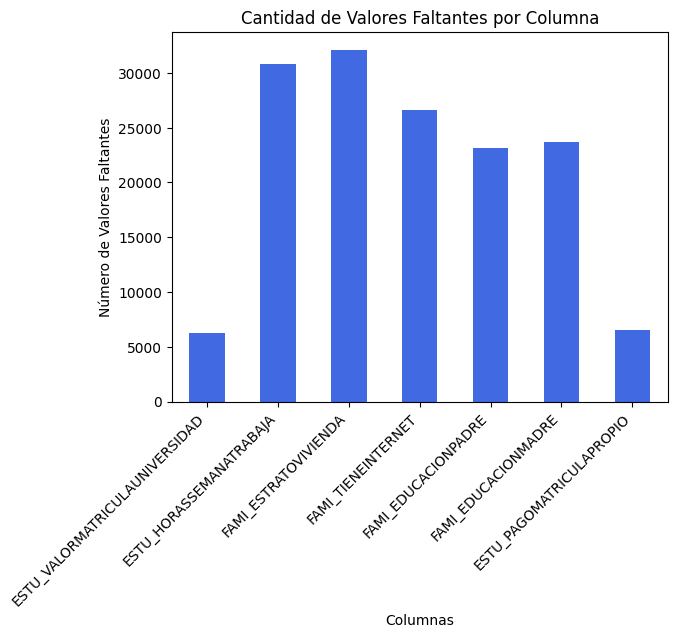

In [3]:
# Crear un histograma de los valores faltantes
missing_values.plot(kind='bar', color='royalblue')
plt.title('Cantidad de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Faltantes')
plt.xticks(rotation=45, ha='right')
plt.show()

**Organizando Datos de ESTU_VALORMATRICULAUNIVERSIDAD**

In [4]:
data.ESTU_VALORMATRICULAUNIVERSIDAD.values[data.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
sum(data.ESTU_VALORMATRICULAUNIVERSIDAD.isna())

0

In [5]:
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

data.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in data.ESTU_VALORMATRICULAUNIVERSIDAD]]
data.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


**Organizando Datos de FAMI_ESTRATOVIVIENDA**

In [6]:
data.FAMI_ESTRATOVIVIENDA.value_counts(dropna=False)

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
NaN,32137
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [7]:
data.FAMI_ESTRATOVIVIENDA.values[data.FAMI_ESTRATOVIVIENDA.isna()] = 'Sin Estrato'
sum(data.FAMI_ESTRATOVIVIENDA.isna())

0

In [8]:
estrato_map = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': -1  # Para manejar el caso de 'no info' si existe
}

data.FAMI_ESTRATOVIVIENDA = np.r_[[estrato_map[i] for i in data.FAMI_ESTRATOVIVIENDA]]
data.FAMI_ESTRATOVIVIENDA.value_counts(dropna=False)

,count
FAMI_ESTRATOVIVIENDA,
2,232671
3,210685
1,111991
4,65514
-1,35426
5,23608
6,12605


In [9]:
imputacion_map = {
    1.75: 4,
    3.25: 5,
    0.25: 2,
    0.75: 3,
    4.75: 6,
    7.75: 6,
    6.25: 6,
    0.00: 1,
}

# Asignar el valor de imputación donde FAMI_ESTRATOVIVIENDA es -1
data['FAMI_ESTRATOVIVIENDA'] = data.apply(
    lambda row: imputacion_map.get(row['ESTU_VALORMATRICULAUNIVERSIDAD'], -1)
    if row['FAMI_ESTRATOVIVIENDA'] == -1 else row['FAMI_ESTRATOVIVIENDA'],
    axis=1
)

In [10]:
data['FAMI_ESTRATOVIVIENDA'].value_counts(dropna=False)

,count
FAMI_ESTRATOVIVIENDA,
2,237993
3,214705
1,113033
4,75053
5,29552
6,20270
-1,1894


**Organizando Datos de FAMI_EDUCACIONMADRE**

In [11]:
data = data.copy()
data.FAMI_EDUCACIONMADRE = data.FAMI_EDUCACIONMADRE.fillna('no info')
data.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in data.FAMI_EDUCACIONMADRE.values]
value_counts = data.FAMI_EDUCACIONMADRE.value_counts()
print(value_counts)

FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56125
Postgrado                                46246
no info                                  28599
Técnica o tecnológica incompleta         27533
Educación profesional incompleta         22470
Ninguno                                  14483
Name: count, dtype: int64


In [12]:
x = data.FAMI_EDUCACIONMADRE.values
FAMI_EDUCACIONMADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONMADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
FAMI_EDUCACIONMADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [13]:
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in data.FAMI_EDUCACIONMADRE]]
FAMI_EDUCACIONMADRE_onehot_enc

FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
FAMI_EDUCACIONMADRE_df

data = pd.concat([FAMI_EDUCACIONMADRE_df, data], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)
data.shape

(692500, 22)

**Organizando Datos de FAMI_EDUCACIONPADRE**

In [14]:
data = data.copy()
data.FAMI_EDUCACIONPADRE = data.FAMI_EDUCACIONPADRE.fillna('no info')
data.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in data.FAMI_EDUCACIONPADRE.values]
value_counts = data.FAMI_EDUCACIONPADRE.value_counts()
print(value_counts)

FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
no info                                  48999
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
Name: count, dtype: int64


In [15]:
xp = data.FAMI_EDUCACIONPADRE.values
FAMI_EDUCACIONPADRE_vals = sorted(np.unique(xp))
FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
FAMI_EDUCACIONPADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [16]:
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in data.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_onehot_enc

FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
FAMI_EDUCACIONPADRE_df

data = pd.concat([FAMI_EDUCACIONPADRE_df, data], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
data.shape

(692500, 32)

**Organizando Datos de  FAMI_TIENEINTERNET**

In [17]:
# Calcular la moda de FAMI_TIENEINTERNET para cada estrato
mode_internet_by_stratum = data.groupby('FAMI_ESTRATOVIVIENDA')['FAMI_TIENEINTERNET'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

def impute_internet(row):
    if pd.isna(row['FAMI_TIENEINTERNET']):
        return mode_internet_by_stratum.get(row['FAMI_ESTRATOVIVIENDA'], row['FAMI_TIENEINTERNET'])
    return row['FAMI_TIENEINTERNET']

# Imputar valores NaN en FAMI_TIENEINTERNET basándose en FAMI_ESTRATOVIVIENDA
data['FAMI_TIENEINTERNET'] = data.apply(impute_internet, axis=1)

In [18]:
data.FAMI_TIENEINTERNET.value_counts(dropna=False)

,count
FAMI_TIENEINTERNET,
Si,619143
No,73357


**Organizando Datos de ESTU_HORASSEMANATRABAJA**

In [19]:
data.ESTU_HORASSEMANATRABAJA.values[data.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
sum(data.ESTU_HORASSEMANATRABAJA.isna())

0

In [20]:
# Definir el diccionario de mapeo
map_horassemanatrabaja = {
    '0': 0,
    'Más de 30 horas': 30,
    'Entre 21 y 30 horas': 25,
    'Entre 11 y 20 horas': 15,
    'Menos de 10 horas': 5,
    'no info': -1,
}

data.ESTU_HORASSEMANATRABAJA = np.r_[[map_horassemanatrabaja[i] for i in data.ESTU_HORASSEMANATRABAJA]]
data.ESTU_HORASSEMANATRABAJA.value_counts(dropna=False)

,count
ESTU_HORASSEMANATRABAJA,
30,249352
0,116550
15,115857
25,92693
5,87191
-1,30857


In [21]:
# # Imputar datos faltantes en ESTU_HORASSEMANATRABAJA usando la media por FAMI_ESTRATOVIVIENDA
# data['ESTU_HORASSEMANATRABAJA'] = data.groupby('FAMI_ESTRATOVIVIENDA')['ESTU_HORASSEMANATRABAJA'].transform(
#     lambda x: x.fillna(x.mean())
# )

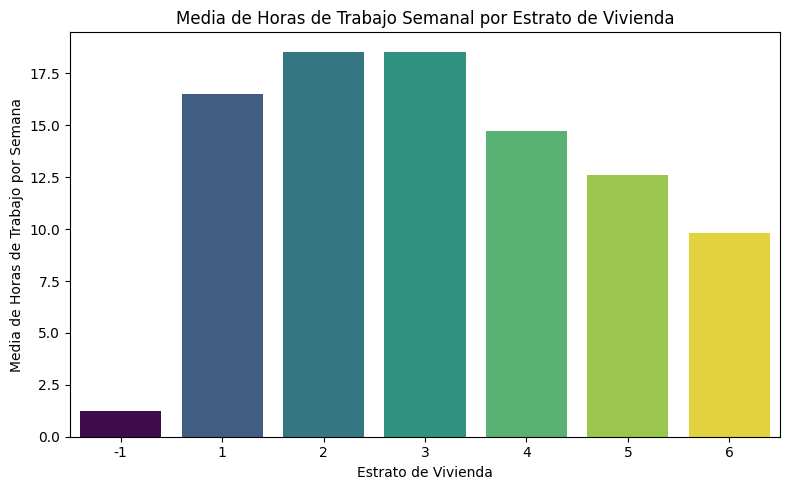

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la media de ESTU_HORASSEMANATRABAJA por cada FAMI_ESTRATOVIVIENDA
mean_hours_per_estrato = data.groupby('FAMI_ESTRATOVIVIENDA')['ESTU_HORASSEMANATRABAJA'].mean()

# Crear la gráfica de barras
plt.figure(figsize=(8, 5))
sns.barplot(
    x=mean_hours_per_estrato.index,
    y=mean_hours_per_estrato.values,
    hue=mean_hours_per_estrato.index,
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title('Media de Horas de Trabajo Semanal por Estrato de Vivienda')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Media de Horas de Trabajo por Semana')
plt.tight_layout()
plt.show()

In [23]:
imputacion_horas_trabajo = {
    1: 15,
    2: 30,
    3: 25,
    4: 15,
    5: 10,
    6: 5,
    -1: -1,
}

# Asignar el valor de imputación donde ESTU_HORASSEMANATRABAJA es -1
data['ESTU_HORASSEMANATRABAJA'] = data.apply(
    lambda row: imputacion_horas_trabajo.get(row['FAMI_ESTRATOVIVIENDA'], -1)
    if row['ESTU_HORASSEMANATRABAJA'] == -1 else row['ESTU_HORASSEMANATRABAJA'],
    axis=1
)

In [24]:
data.ESTU_HORASSEMANATRABAJA.value_counts(dropna=False)

,count
ESTU_HORASSEMANATRABAJA,
30,255350
15,124499
0,116550
25,97273
5,92935
10,4210
-1,1683


**Organizando Datos de ESTU_PAGOMATRICULAPROPIO**

In [25]:
data.ESTU_PAGOMATRICULAPROPIO.value_counts(dropna=False)

,count
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801
NaN,6498


In [26]:
# Definir la función de imputación
def imputar_pagomatriculaproprio(horas_semanas):
    if horas_semanas in [30.0, 25.0]:
        return 'Si'
    elif horas_semanas in [15.0, 5.0]:
        return 'No'
    else:
        return -1  # Para -1.0 o NaN

# Imputar valores en ESTU_PAGOMATRICULAPROPIO
data.ESTU_PAGOMATRICULAPROPIO = data.ESTU_PAGOMATRICULAPROPIO.fillna(
    data.ESTU_HORASSEMANATRABAJA.map(imputar_pagomatriculaproprio)
)


In [27]:
data.ESTU_PAGOMATRICULAPROPIO.value_counts(dropna=False)

,count
ESTU_PAGOMATRICULAPROPIO,
No,383584
Si,306200
-1,2716


**Organizando ESTU_PRGM_ACADEMICO**

In [28]:
# Definir las categorías y palabras clave
categories = {
    'Salud y Medicina': ['ENFERMERIA', 'MEDICINA', 'MEDICINA VETERINARIA', 'ODONTOLOGIA', 'FISIOTERAPIA', 'SALUD', 'ENFERMERÍA', 'QUIRURGICA', 'ZOOTECNIA', 'QUIMICA FARMACEUTICA', 'FARMACIA',
                         'BIOLOGIA','BIOLOGÍA', 'OCUPACIONAL', 'TERAPIA','BACTERIOLOGIA','LABORATORIO','OPTOMETRÍA','OPTOMETRIA', 'FONOAUDIOLOGIA', 'ODONTOLOGÍA','GERONTOLOGIA'],
    'Comunicación y Medios': ['COMUNICACION AUDIOVISUAL', 'MARKETING','AUDIOVISUALES', 'PROFESIONAL EN CINE Y TELEVISION','CINE','PUBLICITARIA','VISUAL','FOTOGRAFÍA','PRODUCCION','COMUNICACI¿¿N','ENTRETENIMIENTO',
                              'PRODUCCIÓN','DISE¿O CROSSMEDIA','ANIMACIÓN'],
    'Derecho': ['DERECHO'],
    'Administración y Negocios': ['ADMINISTRACION','ADMINISTRACI¿N','ADMINISTRACIÓN', 'NEGOCIOS', 'FINANZAS','INTERNACIONALES', 'COMERCIO', 'MERCADEO', 'PUBLICIDAD', 'ECONOMÍA','ECONOM¿A','ECONOMIA', 'LOGISTICA EMPRESARIAL',
                                  'GERENCIA','MERCADOLOGIA','RELACIONES','ADMINSITRACIÓN'],
    'Ciencias Sociales': ['SOCIAL','GOBIERNO','CIENCIA POLITICA','POLITICAS','POLÍTICO' 'RELACIONES INTERNACIONALES', 'JURISPRUDENCIA','POLÍTICA','SOCIOLOGIA','PERIODISMO','GESTION CULTURAL', 'SOCIOLOGÍA','TERRITORIAL',
                          'COMUNICACION','COMUNICACIÓN','CONFLICTOS'],
    'Ingeniería': ['INGENIERIA', 'INGENIERÍA', 'INGENIER¿A','INGENIERÌA','INGENIIERIA'],
    'Arquitectura': ['ARQUITECTURA','ARQUEOLOGIA'],
    'Contaduría': ['CONTADURÍA', 'CONTADURIA'],
    'Educación': ['MAESTRO', 'PEDAGOGÍA','FAMILIAR'],
    'Arte y Diseño': ['ARTES', 'DANZA', 'DISEÑO', 'ANTROPOLOGIA','ANTROPOLOGÍA','ESTUDIOS MUSICALES','MUSICA','MUSICAL','ARTE','MÚSICA','CULTURAL','DIRECCION DE BANDA','DISENO GRAFICO'],
    'Literatura': ['ESTUDIOS LITERARIOS','LITERATURA','LITERARIA','NARRATIVAS'],
    'Licenciatura': ['LICENCIATURA'],
    'Humanidades': ['FILOSOFIA','FILOSOFÍA', 'HUMANIDADES', 'PSICOLOGÍA','PSICOLOGIA','PSICÓLOGA', 'FILOLOGIA', 'TEOLOGIA','TEOLOGÍA', 'BIBLICAS', 'HISTORIA','RECREACION'],
    'Educación Física': ['EDUCACION FISICA', 'DEPORTES', 'DEPORTE','DEPORTIVO','DEPORTIVA'],
    'Idiomas': ['IDIOMAS', 'IDIOMA','INGLÉS','INGLES','ESPAÑOL', 'FRANCES', 'LENGUAS', 'LINGUISTICA'],
    'Turismo y Hospitalidad': ['HOTELERIA Y TURISMO', 'TURISMO','HOTELERA'],
    'Medio Ambiente': ['ECOLOGIA','GEOLOGIA','ACUICULTURA','AMBIENTALES','ECOLOGÍA'],
    'Ciencias Forenses y Criminalística': ['PROFESIONAL EN CRIMINALISTICA', 'CRIMINALISTICA','CRIMINAL'],
    'Ciencias de la Información': ['CIENCIAS DE LA INFORMACION Y LA DOCUMENTACION', 'ARCHIVISTICA','DOCUMENTACION', 'GESTION EMPRESARIAL',' SISTEMAS DE INFORMACIÓN'],
    'Ciencias Militares': ['CIENCIAS MILITARES', 'CIENCIAS NAVALES PARA OFICIALES DE INFANTERIA','NAVALES'],
    'Agronomía y Ciencias Agrarias': ['AGRONOMIA','AGROINDUSTRIAL','AGROINDUSTRIA'],
    'Construcción': ['CONSTRUCCION', 'CONSTRUCCIONES CIVILES','URBANISMO','URBANOS'],
    'Ciencias Exactas': ['MATEMATICAS', 'QUIMICA','QUÍMICA','QU¿MICA','FÍSICA','FISICA','ESTADISTICA','ESTADÍSTICA','MATEMÁTICA','ASTRONOMIA'],
    'Ciencias Gastronómicas': ['GASTRONOMIA','GASTRONOM¿A', 'CULINARIA Y GASTRONOMÍA', 'NUTRICION','NUTRICIÓN','GASTRONOMÍA'],
    'Ciencias de la Tierra': ['GEOLOGÍA', 'CIENCIAS DE LA TIERRA', 'GEOCIENCIAS', 'INGENIERÍA GEOLOGICA', 'GEOGRAFIA','GEOLOG¿A'],
    'Ciencias de la Computación y Tecnología': ['COMPUTACION', 'INFORMATICA', 'TECNOLOGÍA','BIOTECNOLOGIA','COMPUTACIÓN'],
    'Náutica y Ciencias Marítimas': ['CIENCIAS NAUTICAS', 'NÁUTICA', 'CIENCIAS MARÍTIMAS', 'NAVEGACIÓN MARÍTIMA','OCEANOGRAFÍA'],
    'Conservación y Restauración': ['CONSERVACION Y RESTAURACION DE BIENES MUEBLES']
}

# Función para categorizar programas
def categorize_program(program):
    for category, keywords in categories.items():
        if any(keyword in program.upper() for keyword in keywords):
            return category
    return 'Sin categoría'

# Aplicar la función al DataFrame
data['CATEGORIA'] = data['ESTU_PRGM_ACADEMICO'].apply(categorize_program)

# Contar cuántos programas fueron categorizados y cuántos quedaron sin categoría
category_counts = data['CATEGORIA'].value_counts()

print("\nConteo de categorías:")
print(category_counts)


Conteo de categorías:
CATEGORIA
Administración y Negocios                  147137
Ingeniería                                 142054
Salud y Medicina                            86457
Derecho                                     53840
Humanidades                                 53833
Contaduría                                  52860
Licenciatura                                49313
Ciencias Sociales                           41536
Arte y Diseño                               16318
Arquitectura                                11754
Comunicación y Medios                        8619
Educación                                    6560
Ciencias Exactas                             4035
Educación Física                             2970
Literatura                                   2610
Ciencias Gastronómicas                       2563
Idiomas                                      2332
Ciencias Militares                           1734
Medio Ambiente                               1554
Ciencias de la In

**Convertir variables categóricas a onehot**

In [30]:
columnas_categoricas = ['ESTU_PRGM_DEPARTAMENTO', 'FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO', 'CATEGORIA']

# Inicializar un DataFrame vacío para almacenar los resultados
data_final = data.copy()

for col in columnas_categoricas:
    # Asegurarse de que los valores sean cadenas y manejar NaN
    col_values = data_final[col].fillna('No Info').astype(str).values
    unique_vals = sorted(np.unique(col_values))

    # Crear un diccionario para almacenar la codificación one-hot
    onehot_vals = {val: np.eye(len(unique_vals))[i] for i, val in enumerate(unique_vals)}

    # Codificar los datos en formato one-hot
    onehot_enc = np.r_[[onehot_vals[val] for val in col_values]]

    # Crear un DataFrame a partir de la codificación one-hot
    onehot_df = pd.DataFrame(onehot_enc, columns=[f"{col}__{v}" for v in unique_vals])

    # Concatenar el nuevo DataFrame con los datos originales y eliminar la columna original
    data_final = pd.concat([onehot_df, data_final], axis=1).drop(col, axis=1)

data_final.shape
data = data_final

**Elimino la columna ESTU_PRGM_ACADEMICO ya que tengo la CATEGORÍA**

In [42]:
data = data.drop(columns=['ESTU_PRGM_ACADEMICO'])

# **Luego de la imputación de datos**

In [31]:
# Calcular el número de valores -1 por cada columna
negative_one_count = (data == -1).sum()

# Filtrar solo las columnas que tienen valores -1
negative_one_count_filtered = negative_one_count[negative_one_count > 0]

# Calcular el porcentaje de valores -1 para cada columna
negative_one_percentage = (negative_one_count_filtered / len(data)) * 100

# Combinar los resultados en un DataFrame para una visualización más clara
negative_one_info = pd.DataFrame({'Valores -1': negative_one_count_filtered, 'Porcentaje': negative_one_percentage})

print("Variables con valores -1 y su porcentaje:")
print(negative_one_info)


Variables con valores -1 y su porcentaje:
                                Valores -1  Porcentaje
ESTU_VALORMATRICULAUNIVERSIDAD        6287    0.907870
ESTU_HORASSEMANATRABAJA               1683    0.243032
FAMI_ESTRATOVIVIENDA                  1894    0.273502


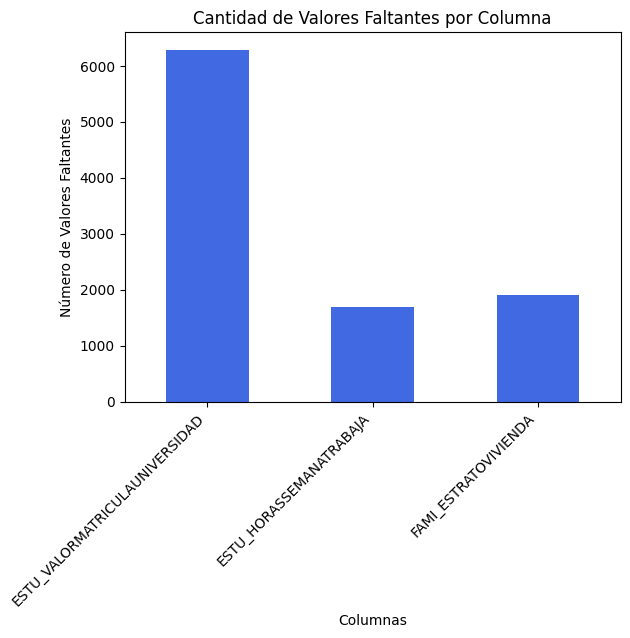

In [32]:
# Crear un histograma de los valores faltantes
negative_one_count_filtered.plot(kind='bar', color='royalblue')
plt.title('Cantidad de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Faltantes')
plt.xticks(rotation=45, ha='right')
plt.show()

**Los datos que son -1 se les toma la media de cada columna y se inserta este valor**

In [ ]:
# Especificar las columnas a procesar
columns_to_replace = ['FAMI_ESTRATOVIVIENDA', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']

# Reemplazar los valores -1 por la media de cada columna
for column in columns_to_replace:
    mean_value = data[column].replace(-1, pd.NA).mean()  # Reemplazar -1 con NaN para calcular la media
    data[column] = data[column].replace(-1, mean_value)  # Reemplazar -1 con la media calculada

# **Convertir RENDIMIENTO_GLOBAL EN VALORES DISCRETOS**

In [38]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
data[y_col] = [rmap[i] for i in data[y_col]]
data.head()

,CATEGORIA__Administración y Negocios,CATEGORIA__Agronomía y Ciencias Agrarias,CATEGORIA__Arquitectura,CATEGORIA__Arte y Diseño,CATEGORIA__Ciencias Exactas,CATEGORIA__Ciencias Forenses y Criminalística,CATEGORIA__Ciencias Gastronómicas,CATEGORIA__Ciencias Militares,CATEGORIA__Ciencias Sociales,CATEGORIA__Ciencias de la Computación y Tecnología,...,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,904256,20212,ENFERMERIA,6.25,5.0,3.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,645256,20212,DERECHO,3.25,0.0,3.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,308367,20203,MERCADEO Y PUBLICIDAD,3.25,30.0,3.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,470353,20195,ADMINISTRACION DE EMPRESAS,4.75,0.0,4.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,989032,20212,PSICOLOGIA,3.25,25.0,3.0,1


# **Construyo x & y para entrenar el modelo**

In [48]:
data_final = data_final.drop(columns=['ESTU_PRGM_ACADEMICO'])

In [49]:
z = data_final
z = z[sorted(z.columns)]

X = z[[c for c in z.columns if c!=y_col]].values
y = z[y_col].values
X.shape, y.shape

((692500, 91), (692500,))

In [50]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 91), (138500, 91), (554000,), (138500,))

In [51]:
from sklearn.linear_model import LogisticRegression

# Usando el solver 'saga'
lr = LogisticRegression()
lr.fit(Xtr, ytr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtr, ytr)


DecisionTreeClassifier(random_state=42)

In [55]:
# Hacer predicciones
y_pred_lr = lr.predict(Xts)
y_pred_dt = dt.predict(Xts)

In [57]:
from sklearn.metrics import classification_report, accuracy_score
# Calcular métricas para Regresión Logística
accuracy_lr = accuracy_score(yts, y_pred_lr)
report_lr = classification_report(yts, y_pred_lr)

# Calcular métricas para Árbol de Decisión
accuracy_dt = accuracy_score(yts, y_pred_dt)
report_dt = classification_report(yts, y_pred_dt)

# Mostrar resultados
print("Logistic Regression Accuracy:", accuracy_lr)
print("Classification Report for Logistic Regression:\n", report_lr)

print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report for Decision Tree:\n", report_dt)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.2840216606498195
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.30      0.00      0.00     34854
           1       0.27      0.56      0.37     34357
           2       0.00      0.00      0.00     34233
           3       0.30      0.57      0.39     35056

    accuracy                           0.28    138500
   macro avg       0.22      0.28      0.19    138500
weighted avg       0.22      0.28      0.19    138500

Decision Tree Accuracy: 0.3326570397111913
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.36      0.36      0.36     34854
           1       0.28      0.28      0.28     34357
           2       0.27      0.27      0.27     34233
           3       0.43      0.42      0.42     35056

    accuracy                           0.33    138500
   macro avg       0.33      0.33      0.33    138500
wei

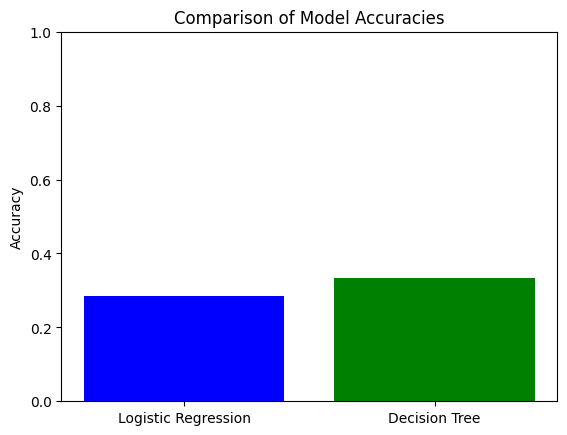

In [58]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para la comparación de precisión
labels = ['Logistic Regression', 'Decision Tree']
accuracies = [accuracy_lr, accuracy_dt]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Limitar el rango de y para claridad
plt.show()


In [ ]:
# Identificar automáticamente las columnas categóricas, normalmente de tipo 'object' o 'category'
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Ver las columnas categóricas
print("Columnas categóricas:", categorical_columns)

In [ ]:
import pandas as pd

# Identificar automáticamente las columnas categóricas, normalmente de tipo 'object' o 'category'
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Ver las columnas categóricas
print("Columnas categóricas:", categorical_columns)


In [ ]:
mediana_estrato = data_final[data_final['FAMI_ESTRATOVIVIENDA'] != -1]['FAMI_ESTRATOVIVIENDA'].median()
data_final['FAMI_ESTRATOVIVIENDA'].replace(-1, mediana_estrato, inplace=True)
data['FAMI_ESTRATOVIVIENDA'].value_counts()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir las columnas predictoras (todas menos 'RENDIMIENTO_GLOBAL')
X = data_final.drop(columns=['ESTU_VALORMATRICULAUNIVERSIDAD'])

# Definir la columna objetivo
y = data_final['RENDIMIENTO_GLOBAL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

In [ ]:
# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


In [ ]:
data.ESTU_PRGM_ACADEMICO.value_counts(dropna=False)